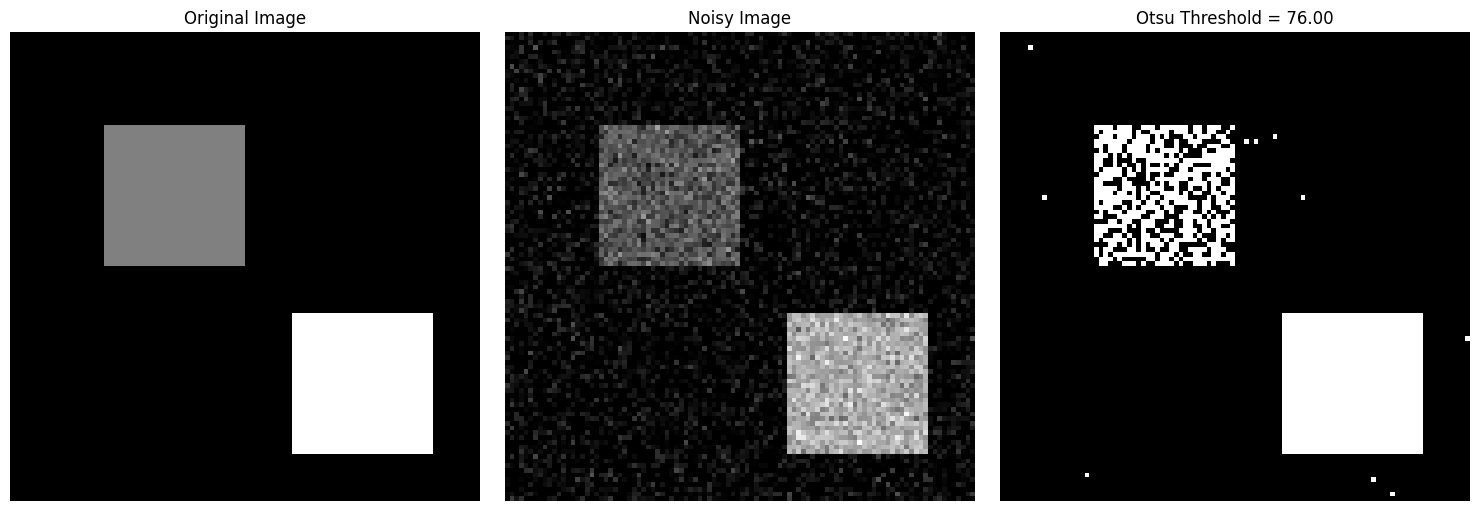

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.filters import threshold_otsu

image = np.zeros((100, 100), dtype=np.uint8)
image[20:50, 20:50] = 85
image[60:90, 60:90] = 170

noisy_image = random_noise(image, mode='gaussian', var=0.01)
noisy_image = (255 * noisy_image).astype(np.uint8)

otsu_thresh = threshold_otsu(noisy_image)
binary_otsu = noisy_image > otsu_thresh

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_otsu, cmap='gray')
plt.title(f'Otsu Threshold = {otsu_thresh:.2f}')
plt.axis('off')

plt.tight_layout()
plt.show()

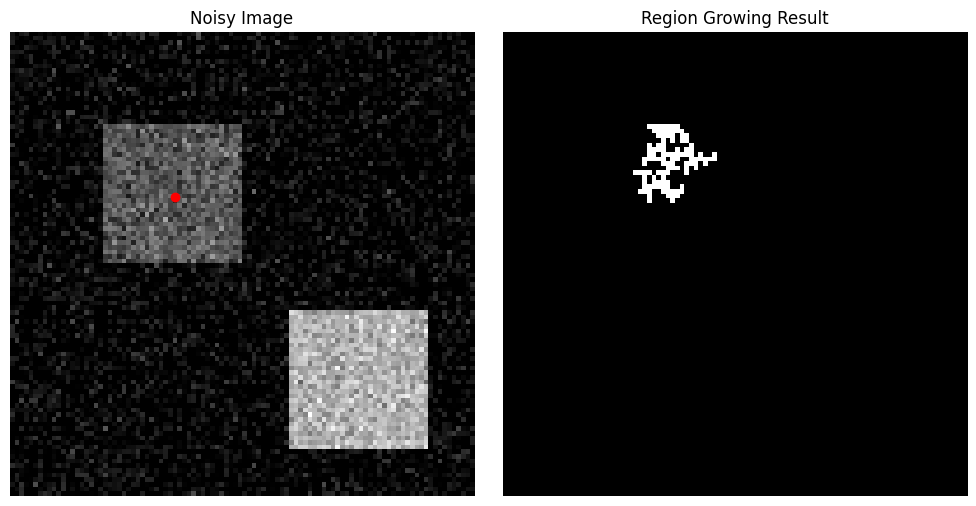

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

image = np.zeros((100, 100), dtype=np.uint8)
image[20:50, 20:50] = 85
image[60:90, 60:90] = 170

# --- Add Gaussian noise ---
noisy_image = random_noise(image, mode='gaussian', var=0.01)
noisy_image = (255 * noisy_image).astype(np.uint8)

# --- Region Growing Function ---
def region_growing(img, seed, thresh=20):
    visited = np.zeros_like(img, dtype=bool)
    region = np.zeros_like(img, dtype=bool)
    stack = [seed]
    seed_val = img[seed]

    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue
        visited[x, y] = True
        if abs(int(img[x, y]) - int(seed_val)) < thresh:
            region[x, y] = True
            for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1]:
                    stack.append((nx, ny))
    return region

# --- Run region growing from a seed point ---
seed_point = (35, 35)  # inside object1
region = region_growing(noisy_image, seed_point, thresh=20)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.plot(seed_point[1], seed_point[0], 'ro')  # Mark seed point
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(region, cmap='gray')
plt.title('Region Growing Result')
plt.axis('off')

plt.tight_layout()
plt.show()
